In [26]:
import pandas as pd
import geopandas as gpd
import json

In [27]:
year_to_keep = "2018"
df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")

df = df.filter(regex=f'{year_to_keep}|Area_code')
df = df.replace('C', 0)
column_name_mapping = json.load(open("name_mapping.json"))
df = df.rename(columns=column_name_mapping)

gdf = gpd.read_file('data/statistical-area-1-2018-generalised/statistical-area-1-2018-generalised.shp')
gdf2 = gpd.read_file("data/statistical-area-2-2018-generalised/statistical-area-2-2018-generalised.shp")
gdf2.head()

/tmp/ipykernel_376608/4204365614.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")


,SA22018_V1,SA22018__1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,190000,Te More,47.922581,47.922581,33420.011116,"POLYGON ((1862216.162 5670176.110, 1862228.190..."
1,100400,Karikari Peninsula,174.180816,174.180816,140012.346179,"MULTIPOLYGON (((1636338.253 6150839.030, 16363..."
2,100500,Tangonge,177.204343,177.204343,101241.085328,"POLYGON ((1622137.152 6120265.782, 1623239.835..."
3,100900,Rangitihi,84.660427,84.660427,60678.427036,"POLYGON ((1626461.006 6119158.300, 1626465.326..."
4,101000,Oruru-Parapara,103.280728,103.280728,67331.035524,"MULTIPOLYGON (((1638658.179 6128997.442, 16386..."


In [45]:
df.head()

,Area_code_and_description,Area_code,sep_house,join_dwlg,oth_dwlg,dwlg_undef,total_dwlg,priv_occ,nonpriv_occ,tot_occ,...,damp_t_s,damp_other,damp_total_occ,mo_o_a4_a,mo_o_a4_s,mould_t_oc,mould_no,mould_t_s,mould_o,mould_t_o
0,SA1 7000000,7000000,42,3,15,0,60,60,0,63,...,42,18,60,9,12,21,15,39,21,60
1,SA1 7000001,7000001,33,0,3,0,39,39,0,39,...,27,9,39,0,3,3,21,24,12,39
2,SA1 7000002,7000002,-1,-1,-1,-1,0,-1,-1,0,...,-1,-1,0,-1,-1,-1,-1,-1,-1,0
3,SA1 7000003,7000003,69,3,0,0,75,75,0,78,...,60,15,75,6,12,18,45,60,15,75
4,SA1 7000004,7000004,48,6,0,0,54,54,0,54,...,48,9,54,6,6,12,33,48,6,54


In [44]:
total_dwlg_sum = df['total_dwlg'].sum()
print("Sum of total_dwlg column:", total_dwlg_sum)
#20969304

Sum of total_dwlg column: 20969304


#### Creating averages and saving in columns
To be used in chloropleth maps in QGIS

In [28]:
df.shape

(32521, 87)

In [29]:
#Set all dtypes to int except Area code and are_code_and_desctription
for col in df.columns:
    if col not in ['Area_code', 'Area_code_and_description']:
        df[col] = df[col].astype(int)

In [30]:
# Seperate_housing avg
#df["separate_housing_avg"] = df["separate_house"] / df["total_private_dwelling"]

#df["4_rooms_or_less_avg"] = (df["one_room_private_dwelling"] + df["two_rooms_private_dwelling"] + df["three_rooms_private_dwelling"] + df["four_rooms_private_dwelling"]) / df["total_stated_private_dwelling"]
#df["5_rooms_or_more_avg"] = (df["five_rooms_private_dwelling"] +  df["six_rooms_private_dwelling"] + df["seven_rooms_private_dwelling"] + df["eight_or_more_rooms_private_dwelling"]) / df["total_stated_private_dwelling"]

In [31]:
df.iloc[:, 13:].head()

,nonpriv_tot,1_rm_dwlg,2_rm_dwlg,3_rm_dwlg,4_rm_dwlg,5_rm_dwlg,6_rm_dwlg,7_rm_dwlg,8+_rm_dwlg,rm_tot_st,...,damp_t_s,damp_other,damp_total_occ,mo_o_a4_a,mo_o_a4_s,mould_t_oc,mould_no,mould_t_s,mould_o,mould_t_o
0,0,0,3,3,3,9,12,12,18,60,...,42,18,60,9,12,21,15,39,21,60
1,0,0,0,3,3,9,12,9,0,39,...,27,9,39,0,3,3,21,24,12,39
2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,0
3,0,0,0,3,6,12,27,15,15,75,...,60,15,75,6,12,18,45,60,15,75
4,0,0,0,3,6,9,15,9,15,54,...,48,9,54,6,6,12,33,48,6,54


<Axes: >

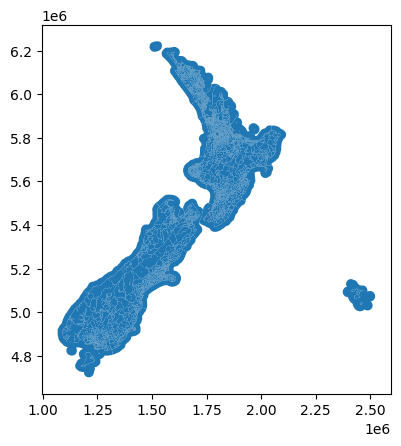

In [32]:
gdf.plot()

In [33]:
gdf['SA12018_V1'] = gdf['SA12018_V1'].str.strip().str.lower()



In [34]:
gdf.head()

,SA12018_V1,LANDWATER,LANDWATER_,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,7000000,12,Mainland,285.489512,285.489512,192613.155735,"MULTIPOLYGON (((1601317.232 6194284.576, 16013..."
1,7000001,12,Mainland,207.202211,207.202211,135791.243048,"MULTIPOLYGON (((1582448.649 6182211.494, 15825..."
2,7000002,22,Inlet,0.000000,63.825713,165092.475327,"POLYGON ((1590890.854 6186235.530, 1590901.088..."
3,7000003,12,Mainland,69.504762,69.504762,60262.340002,"POLYGON ((1597225.802 6179455.856, 1597307.417..."
4,7000004,12,Mainland,166.507255,166.507255,74055.041890,"POLYGON ((1604492.471 6153408.641, 1604337.602..."


In [35]:
gdf['SA12018_V1'] = gdf['SA12018_V1'].astype(str)
df['Area_code'] = df['Area_code'].astype(str)

gdf['SA12018_V1'] = gdf['SA12018_V1'].str.strip()
df['Area_code'] = df['Area_code'].str.strip()

In [36]:
merged_gdf = gdf.merge(df, how = "left", left_on='SA12018_V1', right_on='Area_code')

In [37]:
merged_gdf.head()

,SA12018_V1,LANDWATER,LANDWATER_,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,Area_code_and_description,Area_code,sep_house,...,damp_t_s,damp_other,damp_total_occ,mo_o_a4_a,mo_o_a4_s,mould_t_oc,mould_no,mould_t_s,mould_o,mould_t_o
0,7000000,12,Mainland,285.489512,285.489512,192613.155735,"MULTIPOLYGON (((1601317.232 6194284.576, 16013...",SA1 7000000,7000000,42,...,42,18,60,9,12,21,15,39,21,60
1,7000001,12,Mainland,207.202211,207.202211,135791.243048,"MULTIPOLYGON (((1582448.649 6182211.494, 15825...",SA1 7000001,7000001,33,...,27,9,39,0,3,3,21,24,12,39
2,7000002,22,Inlet,0.000000,63.825713,165092.475327,"POLYGON ((1590890.854 6186235.530, 1590901.088...",SA1 7000002,7000002,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,0
3,7000003,12,Mainland,69.504762,69.504762,60262.340002,"POLYGON ((1597225.802 6179455.856, 1597307.417...",SA1 7000003,7000003,69,...,60,15,75,6,12,18,45,60,15,75
4,7000004,12,Mainland,166.507255,166.507255,74055.041890,"POLYGON ((1604492.471 6153408.641, 1604337.602...",SA1 7000004,7000004,48,...,48,9,54,6,6,12,33,48,6,54


In [38]:
#Check which column names are appearing several times
column_names = merged_gdf.columns
column_names = column_names.tolist()
column_names = [x for x in column_names if column_names.count(x) > 1]
column_names = set(column_names)
column_names

set()

<Axes: >

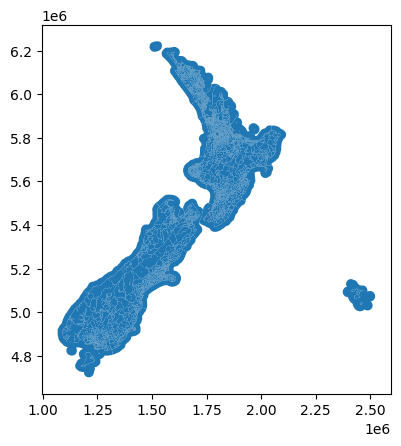

In [39]:
merged_gdf.plot()

In [40]:
#Which column names appear more than once
column_names = merged_gdf.columns
column_names = column_names.tolist()
column_names = [x for x in column_names if column_names.count(x) > 1]
column_names = set(column_names)
column_names


set()

In [41]:
#Save gdf to shp (49s)
import os
file_name = "census_dwelling_2018.shp"


merged_gdf.to_file(file_name)

/tmp/ipykernel_376608/3149996904.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file(file_name)


<Axes: >

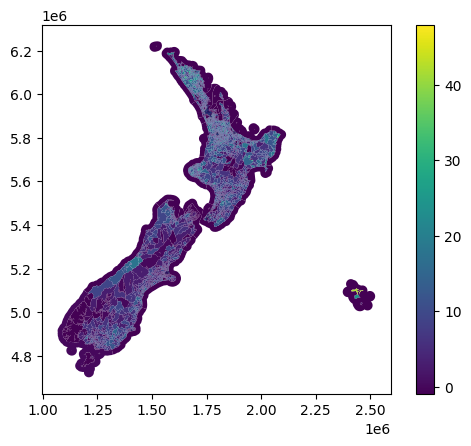

In [42]:
merged_gdf.plot(column='mould_t_oc', legend=True)


#### Creating averages and saving in columns
To be used in chloropleth maps in QGIS

In [43]:
merged_gdf.dtypes

SA12018_V1     object
LANDWATER      object
LANDWATER_     object
LAND_AREA_    float64
AREA_SQ_KM    float64
               ...   
mould_t_oc      int64
mould_no        int64
mould_t_s       int64
mould_o         int64
mould_t_o       int64
Length: 94, dtype: object